# THỰC HÀNH: PHÂN LỚP IRIS BẰNG THUẬT TOÁN KNN

## Mục tiêu:
- Giới thiệu và cài đặt thuật toán KNN từ đầu (không dùng sklearn).
- Tìm hiểu chi tiết dữ liệu Iris.
- Khám phá và trực quan hóa dữ liệu (EDA).
- Tiền xử lý dữ liệu.
- Chia tập train/test.
- Cài đặt KNN và thực nghiệm với nhiều giá trị k.
- So sánh với thư viện sklearn.
- Trực quan hóa và đánh giá mô hình.
- Đưa ra nhận xét và kết luận.


#### Import thư viện

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#### Load dữ liệu Iris

In [28]:
df = pd.read_csv("dataset/Iris.csv")
df.drop(["Id"], axis=1, inplace=True)

df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

#### Mô tả dữ liệu

In [29]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

#### Kiểm tra missing value

In [30]:
df.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


(Iris không có missing value) 

#### Trực quan hóa phân bố từng biến

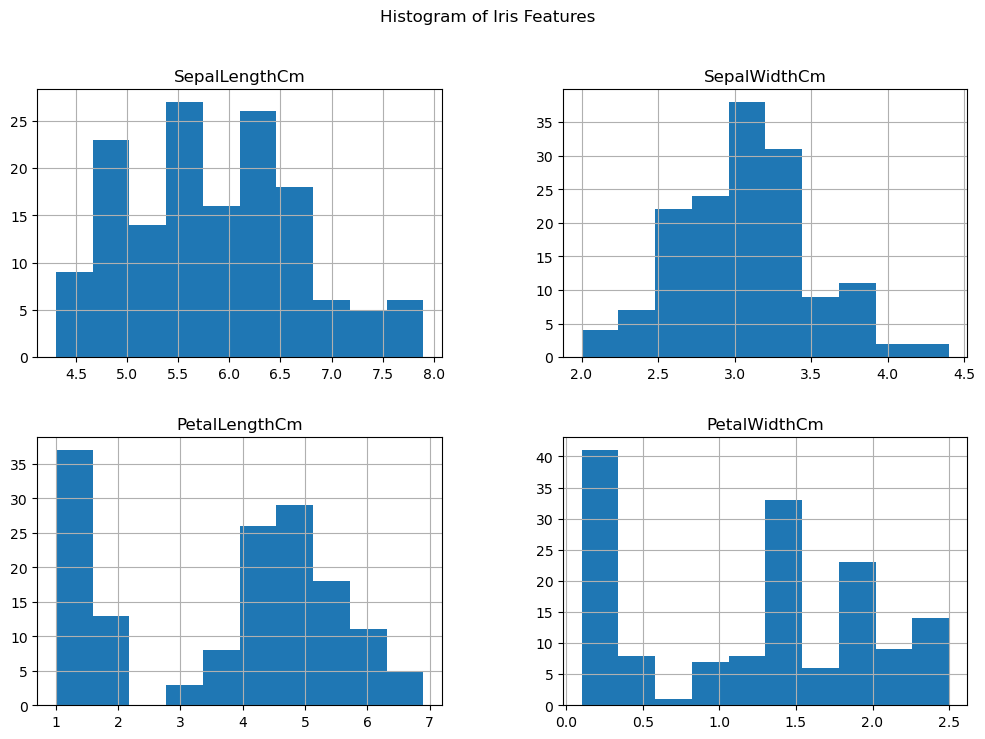

In [31]:
df.hist(figsize=(12,8))
plt.suptitle("Histogram of Iris Features")
plt.show()


#### Boxplot để kiểm tra outlier

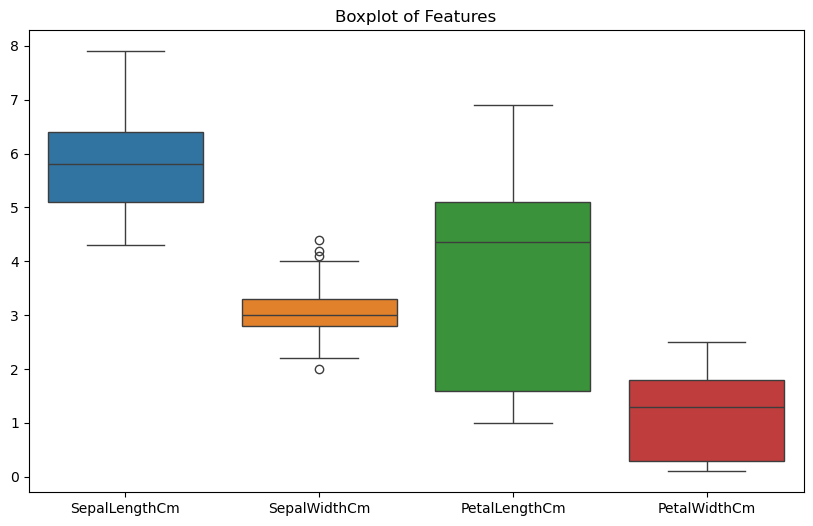

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.iloc[:, :-1])
plt.title("Boxplot of Features")
plt.show()


#### Heatmap tương quan

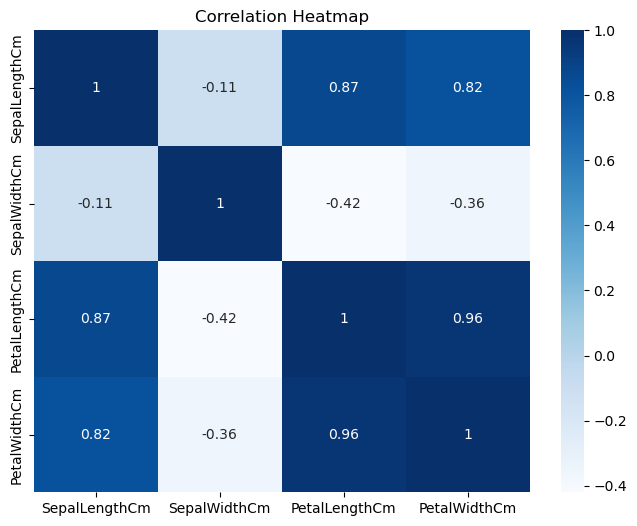

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


#### Pairplot để quan sát phân nhóm

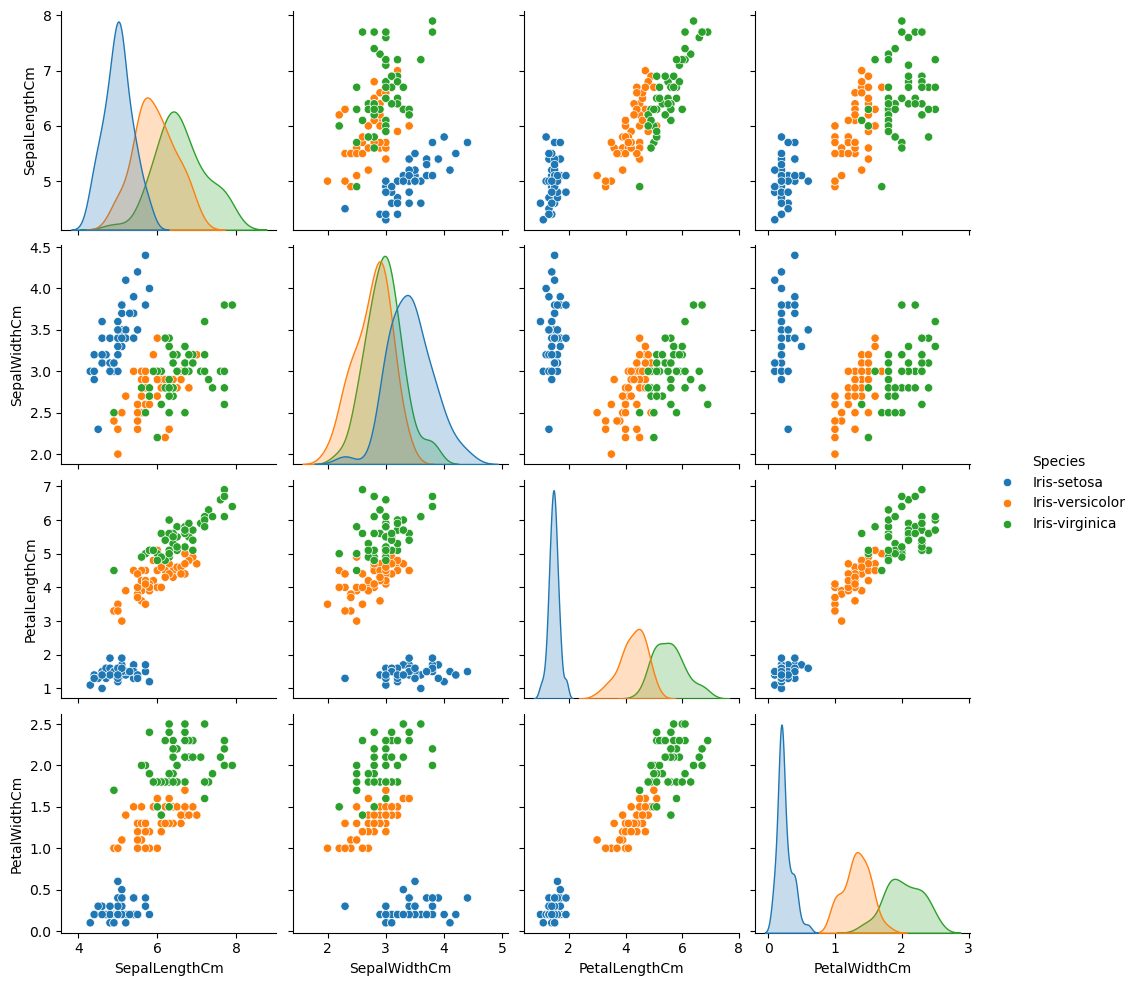

In [34]:
sns.pairplot(df, hue="Species")
plt.show()


→ Đây là biểu đồ quan trọng nhất trong Iris.

#### Encode label + chia train/test

In [36]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

X_train.shape, X_test.shape


((120, 4), (30, 4))

#### Chuẩn hóa dữ liệu

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### HẦN 2 — CÀI ĐẶT KNN THỦ CÔNG

In [38]:
class MyKNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict_one(self, x):
        # tính khoảng cách Euclidean
        distances = np.linalg.norm(self.X_train - x, axis=1)
        
        # lấy k phần tử nhỏ nhất
        k_idx = distances.argsort()[:self.k]
        k_labels = self.y_train[k_idx]
        
        # majority vote
        label = Counter(k_labels).most_common(1)[0][0]
        return label
    
    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])
    
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


#### Chạy thử nghiệm KNN thủ công

In [39]:
model = MyKNN(k=5)
model.fit(X_train_scaled, y_train)

acc = model.accuracy(X_test_scaled, y_test)
acc


np.float64(1.0)

#### Test với nhiều giá trị k

In [40]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = MyKNN(k=k)
    knn.fit(X_train_scaled, y_train)
    accuracies.append(knn.accuracy(X_test_scaled, y_test))

accuracies


[np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0)]

#### Vẽ biểu đồ Accuracy vs k

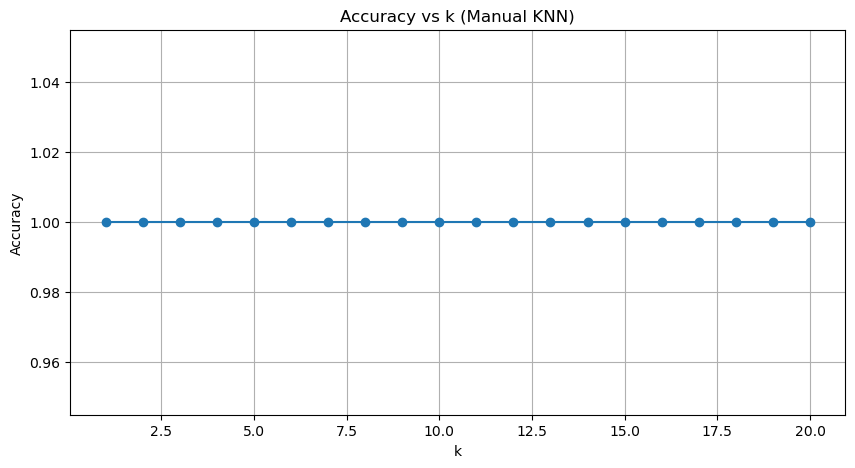

In [41]:
plt.figure(figsize=(10,5))
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k (Manual KNN)")
plt.grid(True)
plt.show()


#### SO SÁNH VỚI SKLEARN

#### Huấn luyện sklearn KNN

In [42]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print("Accuracy (sklearn):", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat


Accuracy (sklearn): 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

#### Vẽ Confusion Matrix

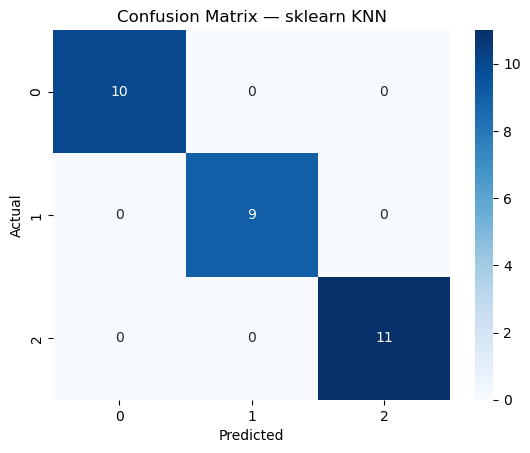

In [43]:
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix — sklearn KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
